In [1]:
# to say to jupyter notebook to plot/show the charts on it 
%matplotlib inline 
import pandas as pd # data frames
import numpy as np # matrix algebra
from matplotlib import pyplot as plt # normal charts
import seaborn as sns # fancy charts

# Regression

## Organize data

### Load data

In [2]:
# read data
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/mli-cohort/master/boston.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# defining vars
input_vars = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13"]
output_var = ["T1"]

# dictionary of variables
pd.read_table("https://raw.githubusercontent.com/askoshiyama/mli-cohort3/master/Boston%20-%20Dictionary%20of%20Variables.txt")

,There are 14 attributes in each case of the dataset. They are:
0,V1 - CRIM - per capita crime rate by town
1,V2 - ZN - proportion of residential land zoned...
2,V3 - INDUS - proportion of non-retail business...
3,V4 - CHAS - Charles River dummy variable (1 if...
4,V5 - NOX - nitric oxides concentration (parts ...
5,V6 - RM - average number of rooms per dwelling
6,V7 - AGE - proportion of owner-occupied units ...
7,V8 - DIS - weighted distances to five Boston e...
8,V9 - RAD - index of accessibility to radial hi...
9,V10 - TAX - full-value property-tax rate per $...


### Some "integrity" checkings

In [4]:
df.dtypes

V1     float64
V2     float64
V3     float64
V4       int64
V5     float64
V6     float64
V7     float64
V8     float64
V9       int64
V10      int64
V11    float64
V12    float64
V13    float64
T1     float64
dtype: object

In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.corr().loc[["T1"]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
T1,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


<AxesSubplot:xlabel='V13', ylabel='[T1]'>

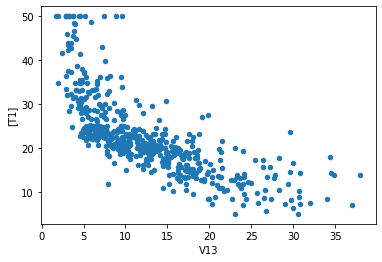

In [9]:
df.plot(y=output_var, x="V13", kind="scatter")

C:\Users\askos\.conda\envs\mli\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


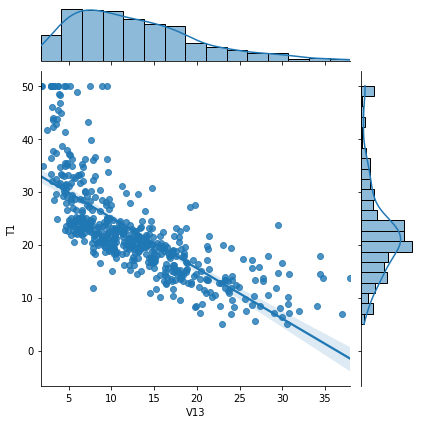

In [10]:
sns.jointplot(df["V13"], df["T1"], kind="reg")

## Modelling

### Settings

In [11]:
from sklearn import metrics
from sklearn.model_selection import KFold

# 5-fold cv
k_folds = KFold(n_splits=5, random_state=10, shuffle=True)

# performance metrics
# homework: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
def mse_score(y_true, y_pred):
    return np.mean( (y_true - y_pred) ** 2.0)

def rmse_score(y_true, y_pred):
    return np.sqrt(mse_score(y_true, y_pred))

def mad_score(y_true, y_pred):
    return np.mean( np.abs(y_true - y_pred) )

def pr2_score(y_true, y_pred):
    return np.corrcoef(y_true, y_pred)[0, 1] ** 2.0

#def pr2_score(y_true, y_pred):
#    return (np.cov(y_true, y_pred)[0, 1] / (np.std(y_true) * np.std(y_pred))) ** 2.0

def r2_score(y_true, y_pred):
    y_bar = np.mean(y_true)
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_bar)**2)

#def r2_score(y_true, y_pred):
#    y_bar = np.mean(y_true)
#    return np.sum((y_pred - y_bar)**2) / np.sum((y_true - y_bar)**2)

def adjpr2_score(y_true, y_pred, p):
    return ( np.corrcoef(y_true, y_pred)[0, 1] ** 2.0 ) * ((y_true.shape[0] - p)/y_true.shape[0])

perf_metrics = {"MSE": mse_score, 
                "RMSE": rmse_score, 
                "Pseudo-R2": pr2_score,
                "R2": r2_score,
                "MAD": mad_score
               }

### Dummy/Baseline Model - Average

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
y_test_pred

array([22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562963,
       22.4562963, 22.4562963, 22.4562963, 22.4562963, 22.4562

In [36]:
# pre-instantiation
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # "fit" model
    model_pred = y_train.mean()

    # get predictions
    y_train_pred = np.repeat(model_pred, y_train.shape[0])
    y_test_pred = np.repeat(model_pred, y_test.shape[0])

    # compute metrics
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
        df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
        k += 1
        
    # if using sklearn: 
    #from sklearn.dummy import DummyRegressor
    #ml = DummyRegressor().fit(x_train, y_train)
    #pred_train = ml.predict(x_train)
    #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


C:\Users\askos\.conda\envs\mli\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\askos\.conda\envs\mli\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [22]:
df_metrics

,Fold,Metric,Train,Test
0,1,MSE,7.696085e+01,1.163304e+02
1,1,RMSE,8.772733e+00,1.078566e+01
2,1,Pseudo-R2,5.041780e-32,1.616821e-32
3,1,R2,0.000000e+00,-1.123500e-01
4,1,MAD,6.303904e+00,7.554703e+00
5,2,MSE,8.777292e+01,7.147500e+01
6,2,RMSE,9.368720e+00,8.454289e+00
7,2,Pseudo-R2,NaN,2.013598e-32
8,2,R2,0.000000e+00,-3.647715e-02
9,2,MAD,6.773327e+00,6.451827e+00


In [23]:
df_metrics.pivot_table(index="Metric", aggfunc="mean")

,Fold,Test,Train
Metric,,,
MAD,3,6.705918e+00,6.643009e+00
MSE,3,8.561962e+01,8.427595e+01
Pseudo-R2,3,4.218032e-32,2.711646e-32
R2,3,-3.820763e-02,0.000000e+00
RMSE,3,9.210837e+00,9.177422e+00


In [ ]:
# Dummy model - RMSE: 9.21

### Simple Linear Regression

In [30]:
coefs

array([[ 3.37565712e+01],
       [-1.15191457e-01],
       [ 3.21117551e-02],
       [ 1.23131596e-02],
       [ 2.87746870e+00],
       [-1.47095174e+01],
       [ 4.08679956e+00],
       [-6.74235335e-03],
       [-1.34175343e+00],
       [ 3.29746068e-01],
       [-1.34303333e-02],
       [-9.71582539e-01],
       [ 9.40382199e-03],
       [-5.20937683e-01]])

In [31]:
# pre-instantiation
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
    
    x_test = df.drop(labels=target, axis=1).values[test]
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])
    
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # fit model
    # train model - coefs = (X_train'X_train)^-1 X_train'y_train
    inv_component = np.linalg.pinv(np.matmul(x_train.transpose(), x_train))
    coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))

    # get predictions
    y_train_pred = np.matmul(x_train, coefs) # ypred_train = X_train*coefs
    y_test_pred = np.matmul(x_test, coefs) # ypred_train = X_test*coefs

    # compute metrics
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
        df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
        k += 1
        
    # if using sklearn: 
    #from sklearn.linear_model import LinearRegression
    #ml = LinearRegression().fit(x_train, y_train)
    #pred_train = ml.predict(x_train)
    #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


#### Stats

In [32]:
df_metrics.pivot_table(index="Metric")

,Fold,Test,Train
Metric,,,
MAD,3,3.415622,3.264779
MSE,3,23.937804,21.667789
Pseudo-R2,3,0.716386,0.742878
R2,3,0.707935,0.742878
RMSE,3,4.858078,4.652427


In [44]:
1 - 4.85 / 9.21

0.473398479913138

In [ ]:
# LR RMSE test: 4.85 - 52.66% decrease in RMSE

### Linear Regression with Polynomial Features

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_params = {"degree": 2,
               "interaction_only": False,
               "include_bias": True
              }

In [48]:
df.drop(labels=target, axis=1).shape

(506, 13)

In [49]:
poly_func = PolynomialFeatures(**poly_params).fit(df.drop(labels=target, axis=1))
x_train = poly_func.transform(df.drop(labels=target, axis=1))

In [58]:
x_train.shape

(405, 105)

In [55]:
# pre-instantiation
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # polynomial features - will include bias automatically
    poly_func = PolynomialFeatures(**poly_params).fit(x_train)
    x_train = poly_func.transform(x_train)
    x_test = poly_func.transform(x_test)
        
    # fit model
    # train model 
    inv_component = np.linalg.pinv(np.matmul(x_train.transpose(), x_train))
    coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))

    # get predictions
    y_train_pred = np.matmul(x_train, coefs)
    y_test_pred = np.matmul(x_test, coefs)

    # compute metrics
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
        df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
        k += 1

    # if using sklearn: 
    # from sklearn.linear_model import LinearRegression
    #ml = LinearRegression().fit(x_train, y_train)
    #pred_train = ml.predict(x_train)
    #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


In [42]:
df_metrics.pivot_table(index="Metric")

,Fold,Test,Train
Metric,,,
MAD,3,2.660769,1.767850
MSE,3,15.883053,5.707234
Pseudo-R2,3,0.823727,0.932166
R2,3,0.799708,0.932166
RMSE,3,3.956649,2.385393


In [46]:
1 - 3.95/4.85

0.18556701030927825

### Polynomial Regression with Backward Elimination

In [62]:
# pre-instantiation
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
poly_params = {"degree": 2,
               "interaction_only": False,
               "include_bias": True
              }
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # polynomial features - will include bias automatically
    poly_func = PolynomialFeatures(**poly_params).fit(x_train)
    x_train = poly_func.transform(x_train)
    x_test = poly_func.transform(x_test)
        
    # fit model
    model = RFE(LinearRegression()).fit(x_train, y_train)
    #model = RFECV(model, step=1, cv=5).fit(x_train, y_train)

    # get predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # compute metrics
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
        df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
        k += 1

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


In [63]:
x_train[:, model.support_].shape

(405, 52)

In [64]:
model.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  9, 20,  1,  1,
        1,  1,  3, 33,  1,  7, 44,  1, 52,  5, 49, 21,  1,  1, 39, 25, 31,
       28, 40, 50, 24, 36, 13,  1,  1,  1, 34,  1,  1, 32, 17, 26,  2,  1,
        1,  1, 14,  1,  8, 18,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 30,  1, 45,  1, 46, 29, 10, 37, 41, 35, 19,  1,
        1, 51, 15, 38, 42,  1, 23,  1, 27,  1, 53, 16, 48, 43, 11, 22,  1,
       54, 47, 12])

In [65]:
model.n_features_

52

In [66]:
df_metrics.pivot_table(index="Metric")

,Fold,Test,Train
Metric,,,
MAD,3,3.114444,2.414910
MSE,3,22.032629,11.587076
Pseudo-R2,3,0.756149,0.869600
R2,3,0.715865,0.863468
RMSE,3,4.534063,3.329848


In [ ]:
3.95 / 4.53

#### Different implementation

In [67]:
# pre-instantiation
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
poly_params = {"degree": 2,
               "interaction_only": False,
               "include_bias": True
              }
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
        
    # fit model
    model = Pipeline([("Poly", PolynomialFeatures(**poly_params)),
                      ("LR-BE", RFE(LinearRegression()))])
    model.fit(x_train, y_train)

    # get predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # compute metrics
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
        df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
        k += 1

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


In [68]:
df_metrics.pivot_table(index="Metric")

,Fold,Test,Train
Metric,,,
MAD,3,3.114444,2.414910
MSE,3,22.032629,11.587076
Pseudo-R2,3,0.756149,0.869600
R2,3,0.715865,0.863468
RMSE,3,4.534063,3.329848


### Ridge Regression

In [71]:
ridge_shrinkage

array([0.001     , 0.00300503, 0.00501005, 0.00701508, 0.0090201 ,
       0.01102513, 0.01303015, 0.01503518, 0.0170402 , 0.01904523,
       0.02105025, 0.02305528, 0.0250603 , 0.02706533, 0.02907035,
       0.03107538, 0.0330804 , 0.03508543, 0.03709045, 0.03909548,
       0.0411005 , 0.04310553, 0.04511055, 0.04711558, 0.0491206 ,
       0.05112563, 0.05313065, 0.05513568, 0.0571407 , 0.05914573,
       0.06115075, 0.06315578, 0.0651608 , 0.06716583, 0.06917085,
       0.07117588, 0.0731809 , 0.07518593, 0.07719095, 0.07919598,
       0.08120101, 0.08320603, 0.08521106, 0.08721608, 0.08922111,
       0.09122613, 0.09323116, 0.09523618, 0.09724121, 0.09924623,
       0.10125126, 0.10325628, 0.10526131, 0.10726633, 0.10927136,
       0.11127638, 0.11328141, 0.11528643, 0.11729146, 0.11929648,
       0.12130151, 0.12330653, 0.12531156, 0.12731658, 0.12932161,
       0.13132663, 0.13333166, 0.13533668, 0.13734171, 0.13934673,
       0.14135176, 0.14335678, 0.14536181, 0.14736683, 0.14937

In [72]:
from sklearn.preprocessing import StandardScaler
# pre-instantiation
ridge_shrinkage = np.linspace(0.01, 0.4, num=200)
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scale  variables
    scaler_x = StandardScaler(with_mean=True, with_std=True).fit(x_train)
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), scaler_x.transform(x_train)])  
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), scaler_x.transform(x_test)])
    
    # fit model
    for l in ridge_shrinkage:
        # train model - coefs = (X'X + I * \lambda * p)^-1 X'y
        inv_component = np.linalg.pinv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
        coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))
        
        # get predictions
        y_train_pred = np.matmul(x_train, coefs) # ypred_train = X * coefs
        y_test_pred = np.matmul(x_test, coefs) # ypred_test = X * coefs
        
        # compute metrics
        for pf in list(perf_metrics.keys()):
            df_metrics.loc[k, "Fold"] = f
            df_metrics.loc[k, "Metric"] = pf
            df_metrics.loc[k, "Shrinkage"] = l
            df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
            df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
            k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = Ridge(alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


#### Stats

In [74]:
df_metrics.pivot_table(index="Shrinkage", columns="Metric", values="Test").head()

Metric,MAD,MSE,Pseudo-R2,R2,RMSE
Shrinkage,,,,,
0.010000,3.413688,23.936490,0.716394,0.707963,4.857872
0.011960,3.413316,23.936255,0.716395,0.707969,4.857834
0.013920,3.412945,23.936028,0.716396,0.707974,4.857796
0.015879,3.412574,23.935808,0.716398,0.707979,4.857760
0.017839,3.412203,23.935595,0.716399,0.707984,4.857724


In [75]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", columns="Metric", values="Test")

<AxesSubplot:xlabel='Shrinkage'>

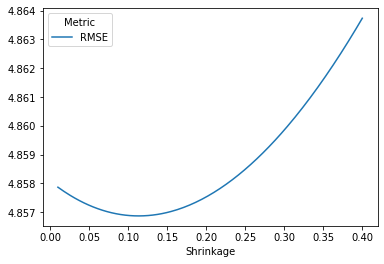

In [76]:
df_agg_metrics[["RMSE"]].plot()

In [77]:
df_agg_metrics.loc[df_agg_metrics["RMSE"].idxmin()]

Metric
MAD           3.394820
MSE          23.933914
Pseudo-R2     0.716442
R2            0.708117
RMSE          4.856875
Name: 0.11386934673366834, dtype: float64

### Ridge + Polynomial Features

In [161]:
# pre-instantiation
from sklearn.linear_model import Ridge
poly_params = {"degree": 1,
               "interaction_only": False,
               "include_bias": False
              }
ridge_shrinkage = np.linspace(0.01, 10000.0, num=200)
target = ["T1"]
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Metric", "Train", "Test"])

# main loop

k, f = 0, 0
for (train, test) in k_folds.split(df.drop(labels=target, axis=1)):
    coefs = []
    f += 1
    print(f)
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scale variables
    #scaler_x = StandardScaler().fit(x_train)
    #x_train = scaler_x.transform(x_train)
    #x_test = scaler_x.transform(x_test)
    
    # polynomial features - will include bias automatically
    #poly_func = PolynomialFeatures(**poly_params).fit(x_train)
    #x_train = poly_func.transform(x_train)
    #x_test = poly_func.transform(x_test)
            
    # fit model
    for l in ridge_shrinkage:
        # train model - min ||coefs||^2, subject to: X coefs = y -- L(\lambda) = ||coefs||^1 + \lambda * (X coefs - y)
        #inv_component = np.linalg.pinv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
        #coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))
        
        # fit model
        model = Pipeline([("Poly", PolynomialFeatures(**poly_params)),
                          ("StdScaler1", StandardScaler()),
                          ("Ridge", Ridge(alpha=l))])
        model.fit(x_train, y_train)
        coefs += [model[2].coef_]
        
        # get predictions
        #y_train_pred = np.matmul(x_train, coefs)
        y_train_pred = model.predict(x_train)
        #y_test_pred = np.matmul(x_test, coefs)
        y_test_pred = model.predict(x_test)
        
        # compute metrics
        for pf in list(perf_metrics.keys()):
            df_metrics.loc[k, "Fold"] = f
            df_metrics.loc[k, "Metric"] = pf
            df_metrics.loc[k, "Shrinkage"] = l
            df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train.ravel(), y_train_pred.ravel())
            df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test.ravel(), y_test_pred.ravel())
            k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge, Lasso
        #ml = Ridge(alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

1
2
3
4
5


In [162]:
r = True
for c in np.array(coefs):
    coef = pd.DataFrame(c[0])
    if r:
        df_coef = coef.copy()
        r=False
    else:
        df_coef = pd.concat([df_coef, coef], axis=1)

In [163]:
df_coef.columns = [str(l) for l in ridge_shrinkage]

<AxesSubplot:>

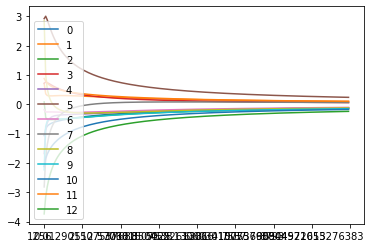

In [164]:
df_coef.transpose().plot()

#### Stats

In [109]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", columns="Metric", values="Test")

<AxesSubplot:xlabel='Shrinkage'>

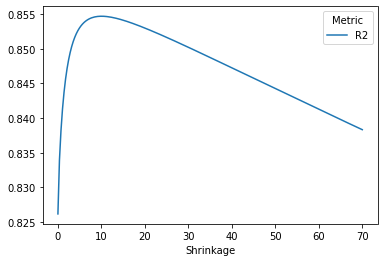

In [117]:
df_agg_metrics[["R2"]].plot()

In [116]:
df_agg_metrics.loc[df_agg_metrics["R2"].idxmin()]

Metric
MAD           2.530416
MSE          13.919401
Pseudo-R2     0.839995
R2            0.826166
RMSE          3.707849
Name: 0.01, dtype: float64

In [103]:
1 - 3.38/9.21

0.6330076004343106

In [92]:
1 - 3.46/3.95

0.1240506329113924

In [93]:
3.46/22

0.15727272727272726

# Classification

## Organize data

### Load data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/mli-cohort/master/german_credit.csv")
df.head()

### Pre-process variables

In [ ]:
# variable types
df.dtypes

In [ ]:
# categorical variables
cat_variables = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex',
                'property', 'other_installment_plans', 'housing', 'job', 'telephone', "other_debtors", 'foreign_worker']

# target variable
output_variable = ["default"]

# other integer variables
int_variables = ['credits_this_bank', 'present_res_since', 'duration_in_month', 'people_under_maintenance', 
                 'installment_as_income_perc', 'age', 'credit_amount']
# list(set(df.columns) - set(output_variable) - set(cat_variables))

In [ ]:
# pre-allocation
df_cat = pd.DataFrame(index=df.index)

# one-hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

# I will do a loop for pedagogical reasons, but it is not entirely necessary
for cat in cat_variables:
    # one-hot encoding fitting
    one_hot_func = OneHotEncoder().fit(df[[cat]])
    
    # mapping
    cat_mapped = one_hot_func.transform(df[[cat]]).toarray()
    
    # storing
    for (k, cat_label) in enumerate(one_hot_func.categories_[0]):
        df_cat[cat + "_" + cat_label] = cat_mapped[:, k]

# quick check
df_cat.mean()

In [ ]:
# bracketing integer variable - age
from sklearn.preprocessing import KBinsDiscretizer
kbin_func = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile').fit(df[["age"]])
df_age = pd.DataFrame(kbin_func.transform(df[["age"]]).toarray(), columns=["young", "adult", "senior"])

# checking
pd.concat([df_age, df[["age"]]], axis=1).head(10)

In [ ]:
# other types of transformations possible - log transformation 
from sklearn.preprocessing import FunctionTransformer
log_mapping = FunctionTransformer(func=np.log, inverse_func=np.exp)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(df["credit_amount"])
ax1.set_title("Pre-transformation")

ax2.hist(log_mapping.transform(df[["credit_amount"]].values))
ax2.set_title("After log-transformation")
df_log = pd.DataFrame(log_mapping.transform(df[["credit_amount"]].values), columns=["log(credit)"])

### Consolidating a final dataset

In [ ]:
df_model = pd.concat([df[int_variables[:-2]], df_cat, df_age, df_log, df[output_variable]], axis=1)
df.shape, df_model.shape

In [ ]:
df_model.head()

## Modelling

In [ ]:
df_model[output_variable].describe()

### Settings

In [ ]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# 3-fold cv
k_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

# performance metrics - 
# homework: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
# homework: https://en.wikipedia.org/wiki/Confusion_matrix, 
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score,
                "AUC": metrics.roc_auc_score, 
                "F1-Score": metrics.f1_score, 
                "Brier": metrics.brier_score_loss
               }

### Logistic Regression - From "Scratch"

In [ ]:
# some functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_prediction(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

def loss(h, y):
    h = np.clip(h, 1e-15, 1 - 1e-15) # too close to zero or one
    return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

In [ ]:
# quick test
theta = np.random.normal(size=df_model.drop(labels=output_variable, axis=1).shape[1])
pred = logistic_prediction(df_model.drop(labels=output_variable, axis=1).values, theta)
loss(pred, df_model[output_variable].values)

In [ ]:
# main loop
# pre-instantiation
n_vars = df_model.drop(labels=output_variable, axis=1).shape[1] # number of variables
step_size = 0.01 # finite difference step-size
lr = 0.01 # learning rate -- dictate the speed
max_iter = 30 # maximum number of iterations
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df_model.drop(labels=output_variable, axis=1), df_model[output_variable]):
    f += 1
    # separate variables and folds
    x_train = df_model.drop(labels=output_variable, axis=1).values[train]
    x_test = df_model.drop(labels=output_variable, axis=1).values[test]
    y_train = df_model[output_variable].values[train]
    y_test = df_model[output_variable].values[test]
    
    # scale variables
    #scaler_x = StandardScaler().fit(x_train)
    #x_train = np.hstack([np.ones((x_train.shape[0], 1)), scaler_x.transform(x_train)])
    #x_test = np.hstack([np.ones((x_test.shape[0], 1)), scaler_x.transform(x_test)])
    
    # fit model
    # initialization
    theta = np.random.normal(size=n_vars) # random coefs
    pred = logistic_prediction(x_train, theta)
    loss_iter = loss(pred, y_train)
    print("fold: %d, iter: %d, loss: %.4f" % (f, 0, loss_iter), end="\r")
    
    # training
    for it in range(1, max_iter):
        log_grad = np.zeros(shape=(n_vars,))
        # compute numerical gradient - finite differences
        for c in range(n_vars):
            new_theta = np.copy(theta)
            new_theta[c] = new_theta[c] + step_size
            new_pred = logistic_prediction(x_train, new_theta)
            c_loss = loss(new_pred, y_train)
            log_grad[c] = (c_loss - loss_iter)/(step_size) # f'(x) ~ (f(x+e) - f(x-e))/2*e
        
        # update model
        theta = theta - lr * log_grad
        
        # get current loss
        pred = logistic_prediction(x_train, theta)
        diff_loss = np.abs(loss_iter - loss(pred, y_train))
        loss_iter = loss(pred, y_train)
        print("fold: %d, iter: %d, loss: %.4f, grad_norm: %.4f" % (f, it, loss_iter, np.linalg.norm(log_grad)), end="\r")
        if diff_loss < 1e-3:
            break
    
    # compute final predictions
    y_train_pred = logistic_prediction(x_train, theta)
    y_test_pred = logistic_prediction(x_test, theta)
    
    # store results
    for pf in list(perf_metrics.keys()):
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Metric"] = pf
        if pf in ["Accuracy", "Precision", "Recall", "F1-Score"]: # put a threshold
            df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train, y_train_pred > 0.5)
            df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test, y_test_pred > 0.5)
        else:
            df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train, y_train_pred)
            df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test, y_test_pred)

        k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = LogisticRegression(penalty="None").fit(x_train, y_train)
        #y_train_pred = ml.predict(x_train)
        #y_test_pred = ml.predict(x_test)

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

In [ ]:
df_metrics.pivot_table(index="Metric", values=["Train", "Test"])

### Sparse Logistic Regression (a.k.a. Ridge Logistic)

In [ ]:
# pre-instantiation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
shrink = np.linspace(0.001, 2.0, num=100)
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Metric", "Train", "Test"])

# main loop
k, f = 0, 0
for (train, test) in k_folds.split(df_model.drop(labels=output_variable, axis=1), df_model[output_variable]):
    f += 1
    # separate variables and folds
    x_train = df_model.drop(labels=output_variable, axis=1).values[train]
    x_test = df_model.drop(labels=output_variable, axis=1).values[test]
    y_train = df_model[output_variable].values[train]
    y_test = df_model[output_variable].values[test]
    
    # scale  variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # fit model
    for l in shrink:
        # train model
        model = LogisticRegression(penalty="l2", C=l, solver="lbfgs").fit(x_train, y_train.ravel())
        
        # get predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        # compute metrics
        for pf in list(perf_metrics.keys()):
            df_metrics.loc[k, "Fold"] = f
            df_metrics.loc[k, "Metric"] = pf
            df_metrics.loc[k, "Shrinkage"] = l
            if pf in ["Accuracy", "Precision", "Recall", "F1-Score"]: # put a threshold
                df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train, y_train_pred > 0.5)
                df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test, y_test_pred > 0.5)
            else:
                df_metrics.loc[k, "Train"] = perf_metrics[pf](y_train, y_train_pred)
                df_metrics.loc[k, "Test"] = perf_metrics[pf](y_test, y_test_pred)

            k += 1
    print("fold: %d" % (f))

# final organization
df_metrics = df_metrics.apply(pd.to_numeric, errors="ignore")

In [ ]:
df_metrics.pivot_table(index=["Shrinkage"], columns=["Metric"], values=["Test"]).head()

In [ ]:
df_metrics.pivot_table(index=["Shrinkage"], columns=["Metric"], values=["Test"])["Test"]["Accuracy"].plot()